In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


from sklearn.externals import joblib

In [100]:
df=pd.read_csv('E://car.csv',)
pd.set_option('display.max_columns',None)

In [101]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Replacing the target variable with numericals ordinally

In [23]:
df.columns=['buying','maint','doors','persons','lug_boot','safety','class(target)']

In [24]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class(target)
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [25]:
df['class(target)'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class(target), dtype: int64

In [26]:
df['class(target)']=df['class(target)'].replace(['unacc','acc','good','vgood'],[0,1,2,3])

In [27]:
df.shape

(1728, 7)

# Feature Engineering

In [28]:
df.dtypes

buying           object
maint            object
doors            object
persons          object
lug_boot         object
safety           object
class(target)     int64
dtype: object

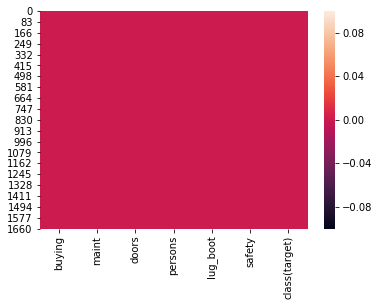

In [29]:
sns.heatmap(df.isnull())   #no missing value in dataset

In [30]:
df.isnull().sum()#no missing value in dataset

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
class(target)    0
dtype: int64

In [31]:
df.describe()

,class(target)
count,1728.000000
mean,0.414931
std,0.740700
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [32]:
df.dtypes

buying           object
maint            object
doors            object
persons          object
lug_boot         object
safety           object
class(target)     int64
dtype: object

In [33]:
df=pd.get_dummies(df)

In [34]:
df.head()

,class(target),buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
3,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


In [35]:
df.shape

(1728, 22)

In [36]:
df.dtypes

class(target)     int64
buying_high       uint8
buying_low        uint8
buying_med        uint8
buying_vhigh      uint8
maint_high        uint8
maint_low         uint8
maint_med         uint8
maint_vhigh       uint8
doors_2           uint8
doors_3           uint8
doors_4           uint8
doors_5more       uint8
persons_2         uint8
persons_4         uint8
persons_more      uint8
lug_boot_big      uint8
lug_boot_med      uint8
lug_boot_small    uint8
safety_high       uint8
safety_low        uint8
safety_med        uint8
dtype: object

# EDA

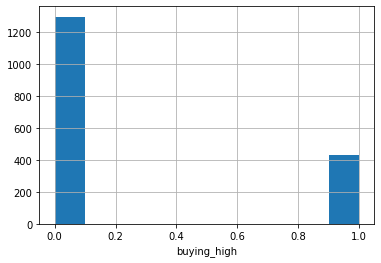

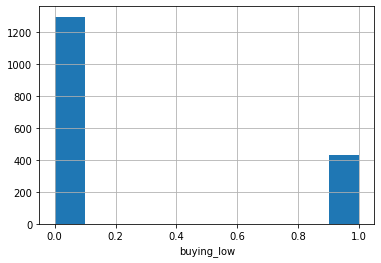

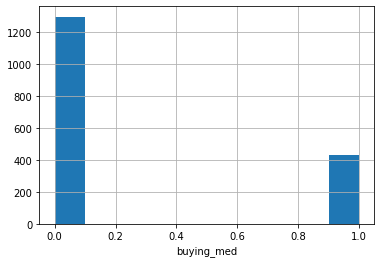

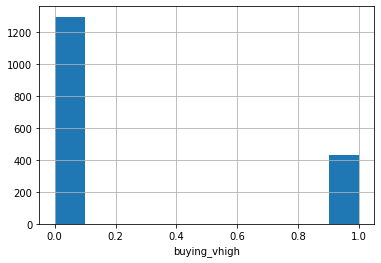

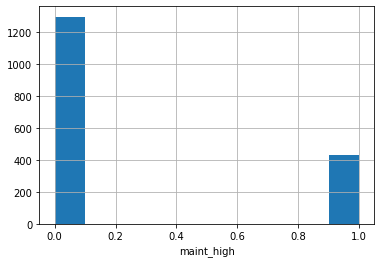

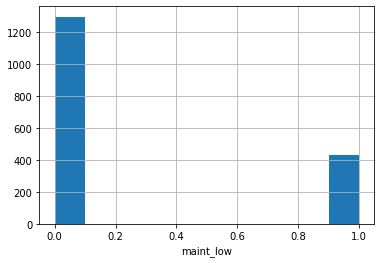

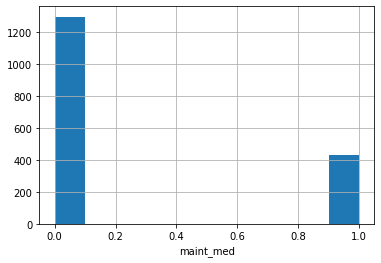

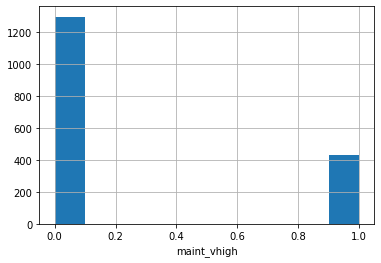

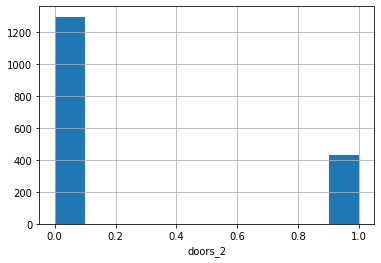

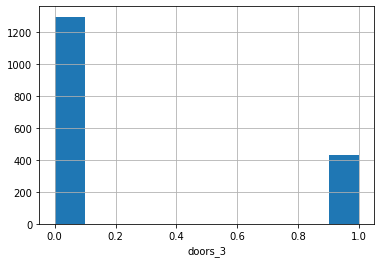

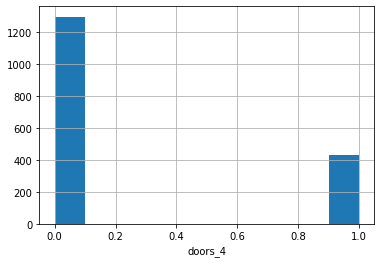

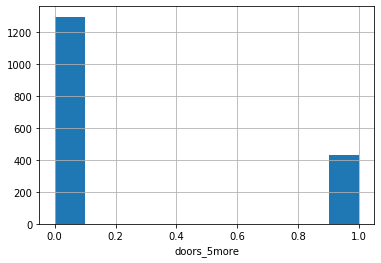

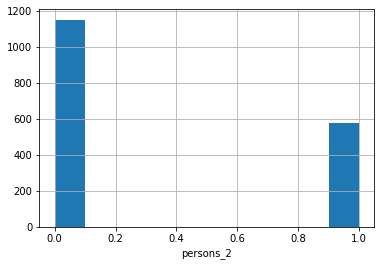

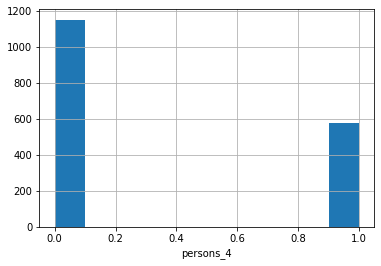

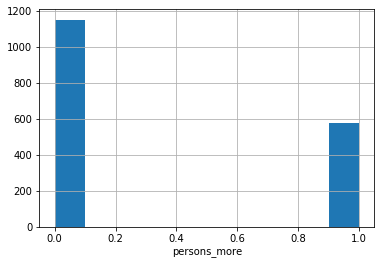

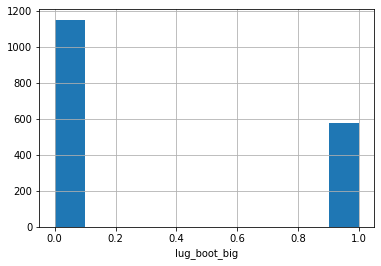

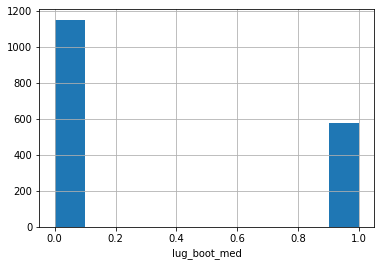

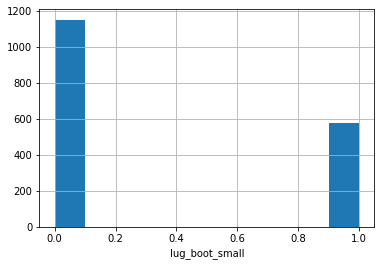

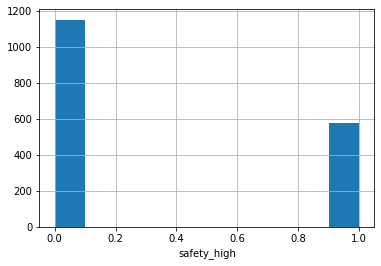

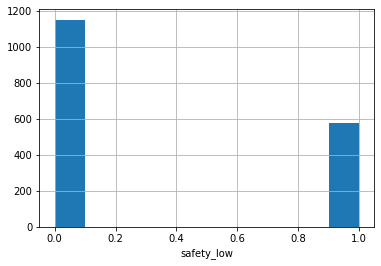

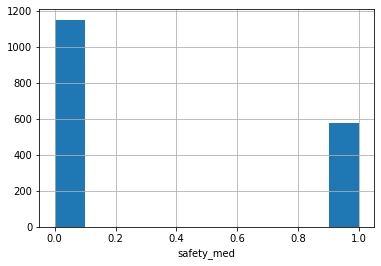

In [38]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
    
        
        df[feature].hist()
        plt.xlabel(feature)
        plt.show()

In [51]:
#checking relation of each attribute w.r.t target attribute

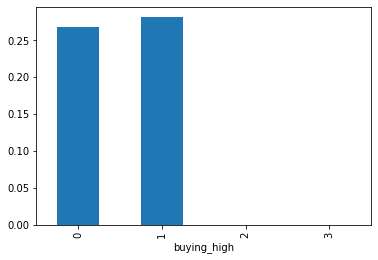

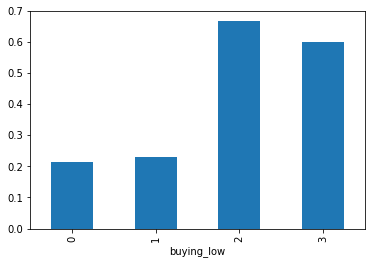

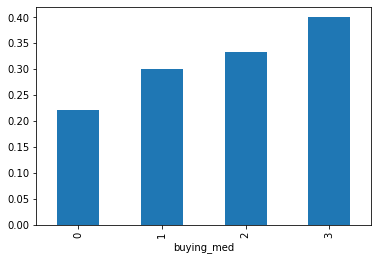

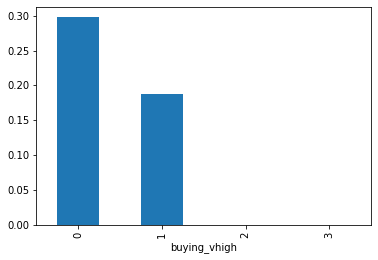

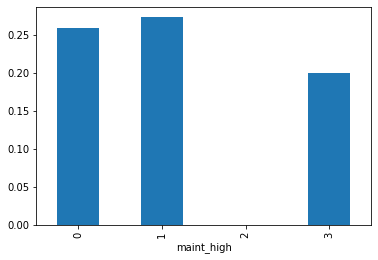

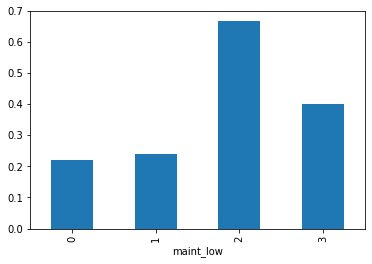

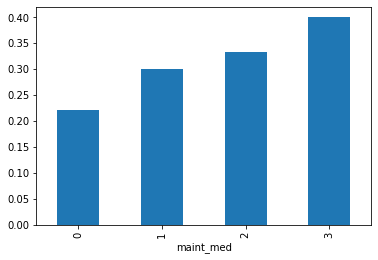

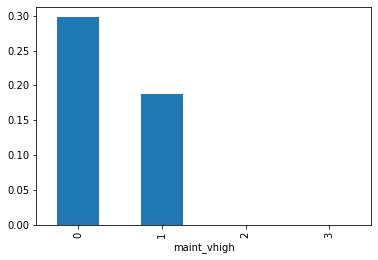

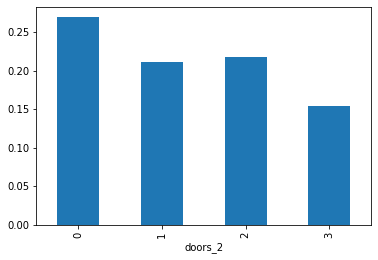

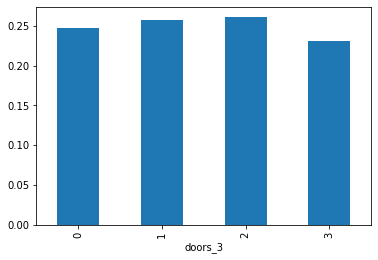

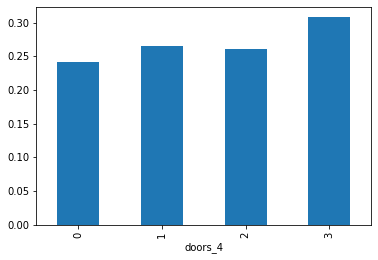

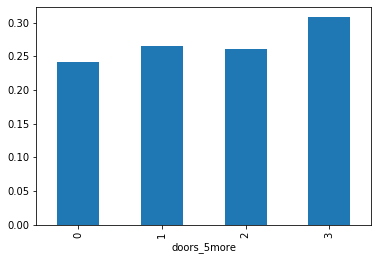

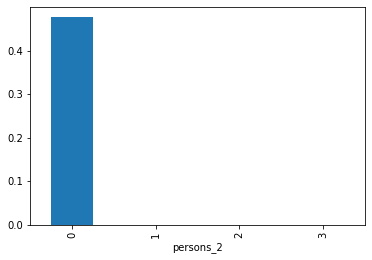

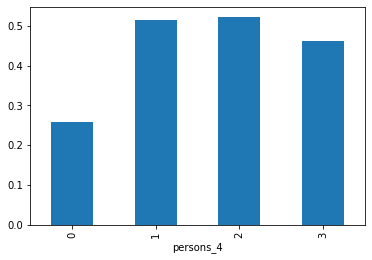

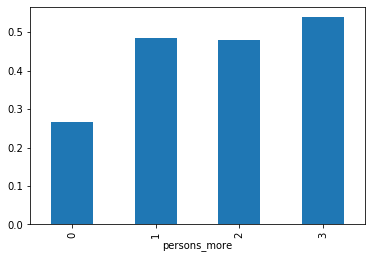

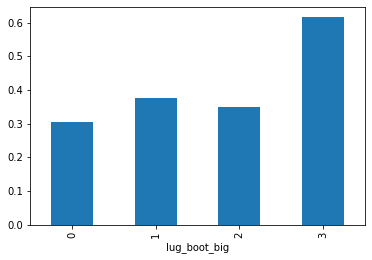

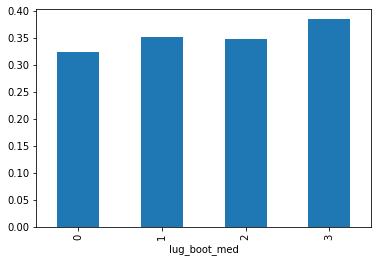

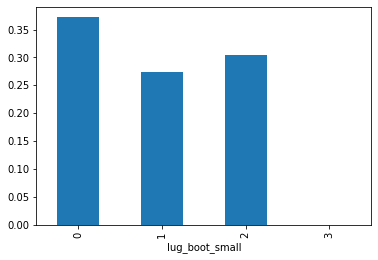

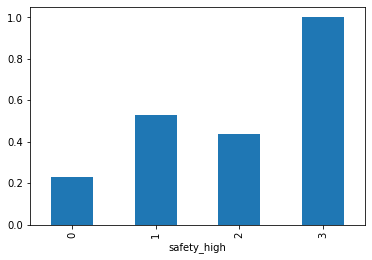

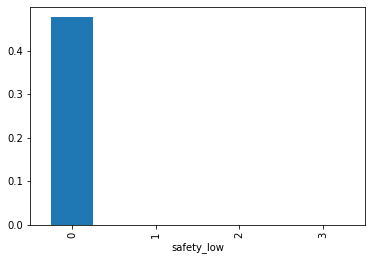

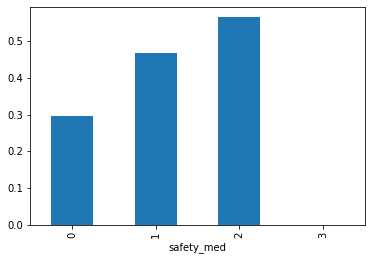

In [40]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
    
        df.groupby('class(target)')[feature].mean().plot.bar()
        plt.xlabel(feature)
        plt.show()


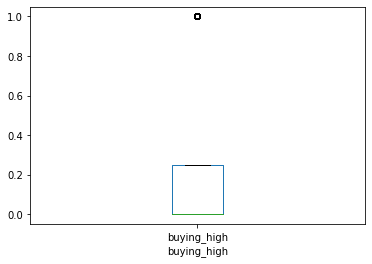

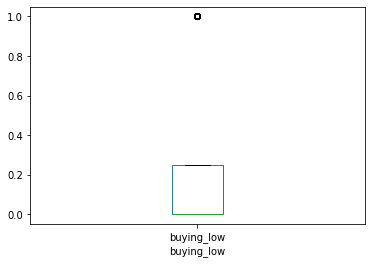

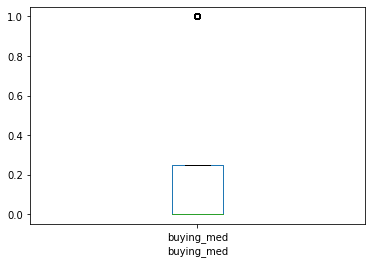

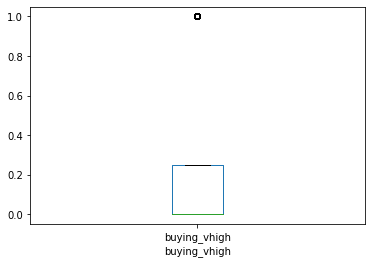

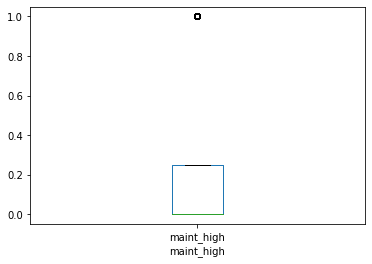

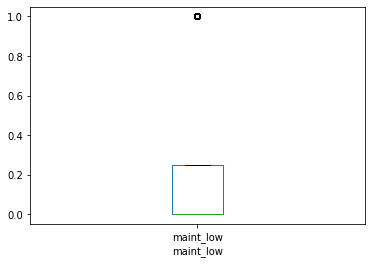

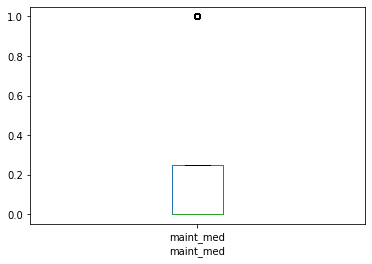

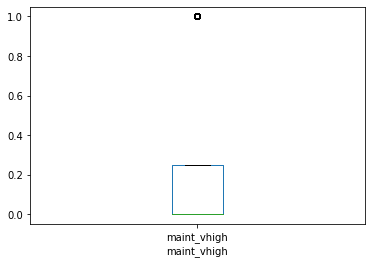

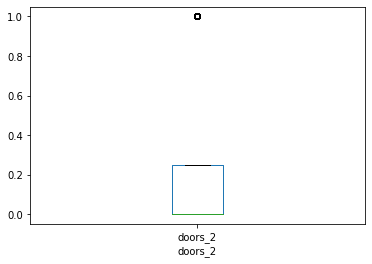

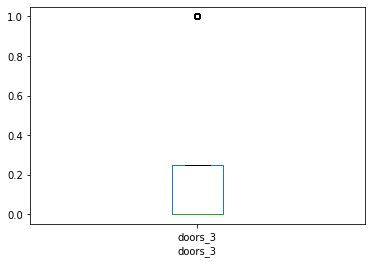

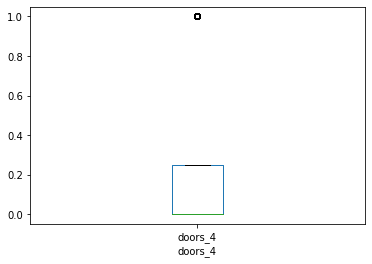

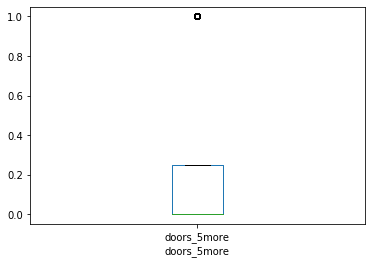

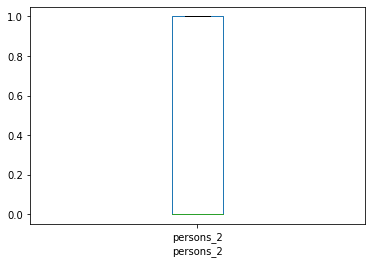

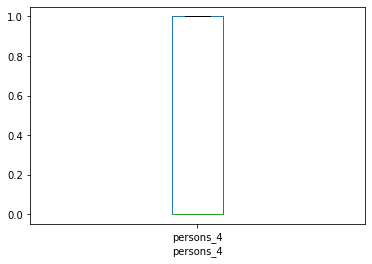

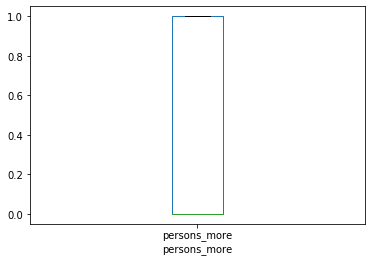

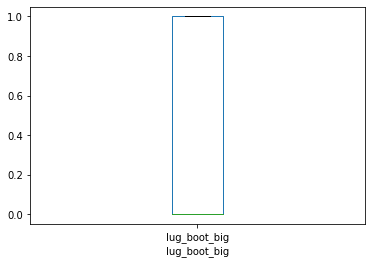

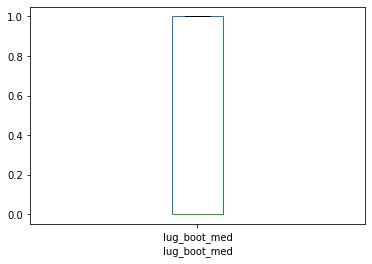

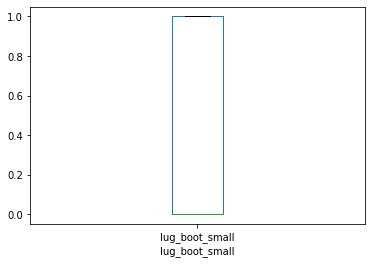

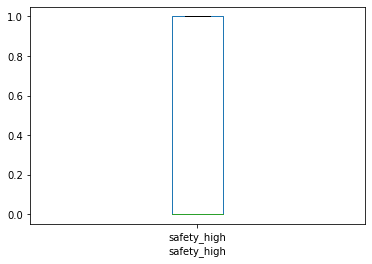

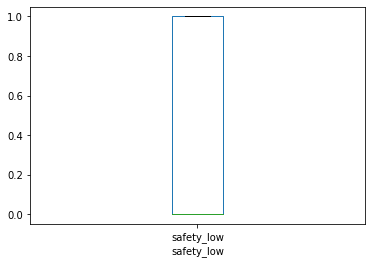

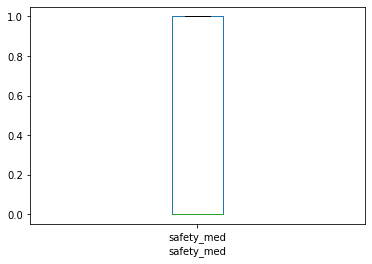

In [41]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
    
        df[feature].plot.box()
        plt.xlabel(feature)
        plt.show()

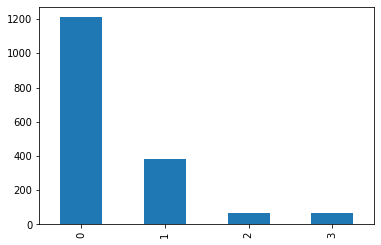

In [42]:
#checking if imbalanced dataset
df['class(target)'].value_counts().plot.bar()

# Separating target and independent variables

In [43]:
y=df['class(target)']
X=df.drop(['class(target)'],axis=1)

# Applying Power transformation to remove skewness

In [44]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [45]:
df.skew()

buying_high       1.155704
buying_low        1.155704
buying_med        1.155704
buying_vhigh      1.155704
maint_high        1.155704
maint_low         1.155704
maint_med         1.155704
maint_vhigh       1.155704
doors_2           1.155704
doors_3           1.155704
doors_4           1.155704
doors_5more       1.155704
persons_2         0.707721
persons_4         0.707721
persons_more      0.707721
lug_boot_big      0.707721
lug_boot_med      0.707721
lug_boot_small    0.707721
safety_high       0.707721
safety_low        0.707721
safety_med        0.707721
dtype: float64

In [46]:
df.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,-0.57735,-0.57735,-0.57735,1.732051,-0.57735,-0.57735,-0.57735,1.732051,1.732051,-0.57735,-0.57735,-0.57735,1.414214,-0.707107,-0.707107,-0.707107,-0.707107,1.414214,-0.707107,1.414214,-0.707107
1,-0.57735,-0.57735,-0.57735,1.732051,-0.57735,-0.57735,-0.57735,1.732051,1.732051,-0.57735,-0.57735,-0.57735,1.414214,-0.707107,-0.707107,-0.707107,-0.707107,1.414214,-0.707107,-0.707107,1.414214
2,-0.57735,-0.57735,-0.57735,1.732051,-0.57735,-0.57735,-0.57735,1.732051,1.732051,-0.57735,-0.57735,-0.57735,1.414214,-0.707107,-0.707107,-0.707107,-0.707107,1.414214,1.414214,-0.707107,-0.707107
3,-0.57735,-0.57735,-0.57735,1.732051,-0.57735,-0.57735,-0.57735,1.732051,1.732051,-0.57735,-0.57735,-0.57735,1.414214,-0.707107,-0.707107,-0.707107,1.414214,-0.707107,-0.707107,1.414214,-0.707107
4,-0.57735,-0.57735,-0.57735,1.732051,-0.57735,-0.57735,-0.57735,1.732051,1.732051,-0.57735,-0.57735,-0.57735,1.414214,-0.707107,-0.707107,-0.707107,1.414214,-0.707107,-0.707107,-0.707107,1.414214


# Scaling the Data

In [47]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(df)
x=pd.DataFrame(data=X_scaled,columns=df.columns)


In [48]:
x.skew()

buying_high       1.155704
buying_low        1.155704
buying_med        1.155704
buying_vhigh      1.155704
maint_high        1.155704
maint_low         1.155704
maint_med         1.155704
maint_vhigh       1.155704
doors_2           1.155704
doors_3           1.155704
doors_4           1.155704
doors_5more       1.155704
persons_2         0.707721
persons_4         0.707721
persons_more      0.707721
lug_boot_big      0.707721
lug_boot_med      0.707721
lug_boot_small    0.707721
safety_high       0.707721
safety_low        0.707721
safety_med        0.707721
dtype: float64

# Model Building

In [49]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [51]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [52]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.8287037037037037


cross_val_score  - 0.6476162524365342


classification report
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       303
           1       0.82      0.57      0.67        96
           2       0.33      0.18      0.23        17
           3       0.40      0.12      0.19        16

    accuracy                           0.83       432
   macro avg       0.60      0.46      0.50       432
weighted avg       0.81      0.83      0.81       432



[[298   5   0   0]
 [ 39  55   2   0]
 [ 10   1   3   3]
 [  4   6   4   2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None,

AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** AdaBoostClassifier *******************


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


Accuracy_score  - 0.8263888888888888


cross_val_score  - 0.8196394871336544


classification report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       303
           1       0.64      0.56      0.60        96
           2       0.00      0.00      0.00        17
           3       0.50      1.00      0.67        16

    accuracy                           0.83       432
   macro avg       0.51      0.63      0.55       432
weighted avg       0.80      0.83      0.81       432



[[287  16   0   0]
 [ 29  54   0  13]
 [  0  14   0   3]
 [  0   0   0  16]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


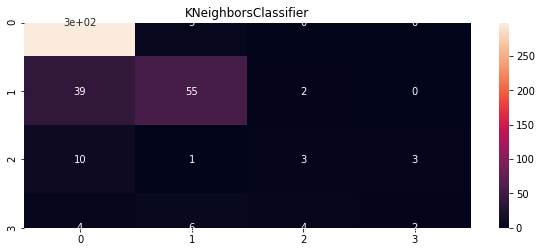

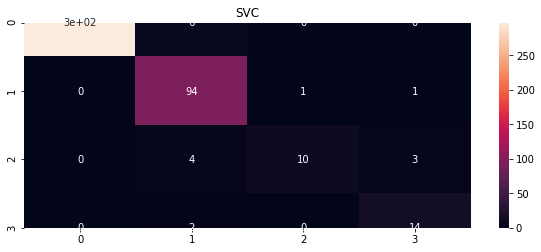

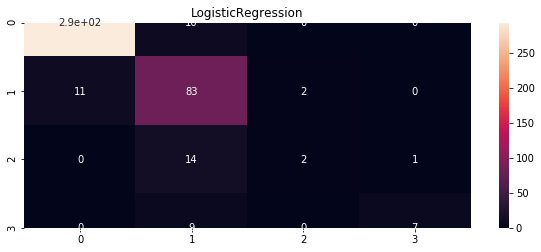

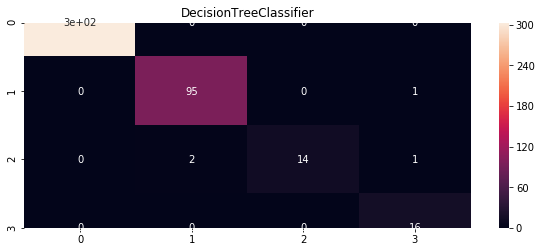

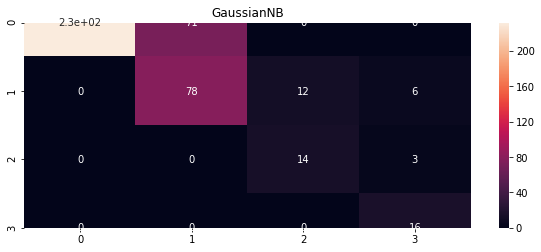

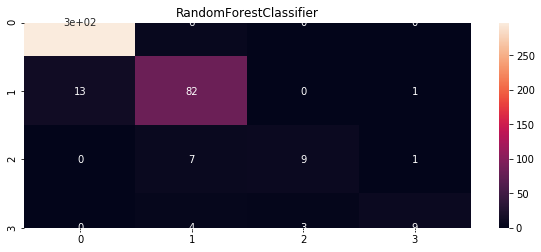

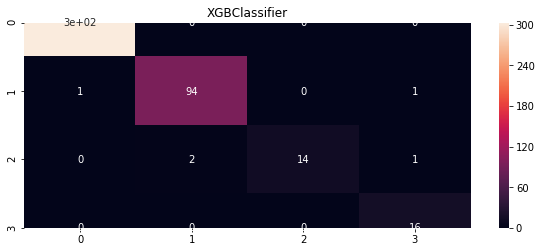

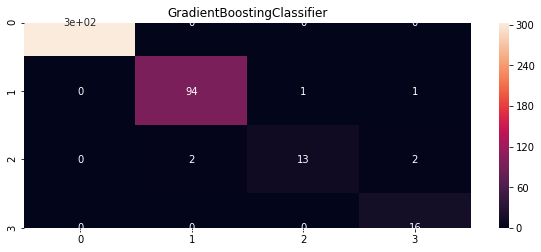

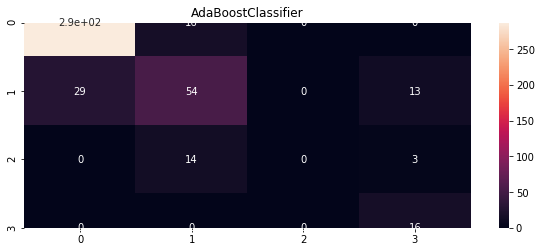

In [54]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    
    

In [55]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,82.870370,64.761625
1,SVC,96.064815,88.500928
2,LogisticRegression,89.120370,81.739410
3,DecisionTreeClassifier,99.074074,84.518743
4,GaussianNB,78.703704,80.290596
5,RandomForestClassifier,91.898148,82.565736
6,XGBClassifier,98.842593,86.429614
7,GradientBoostingClassifier,98.611111,86.150301
8,AdaBoostClassifier,82.638889,81.963949


In [40]:
#We can see from the table DecisionTreeClassifier is the best performing Algorithm.but SVC's cv_score is also best.
#Our target is 90%

In [ ]:
#Hence we will apply Gridsearchcv to the top performing model and try to reach 90% score.

In [ ]:
#Now lets calculate the random state of the models at which they perform the best.

# Finding the best random_state 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [57]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   61   which is   0.8495370370370371
knn 61
max_accuracy_score is at random_state   58   which is   0.9837962962962963
svc 58
max_accuracy_score is at random_state   60   which is   0.9074074074074074
lr 60
max_accuracy_score is at random_state   60   which is   0.9884259259259259
dt 60
max_accuracy_score is at random_state   87   which is   0.8379629629629629
gnb 87
max_accuracy_score is at random_state   99   which is   0.9583333333333334
rfc 99
max_accuracy_score is at random_state   50   which is   0.9976851851851852
xgb 50
max_accuracy_score is at random_state   57   which is   0.9953703703703703
gbc 57
max_accuracy_score is at random_state   99   which is   0.875
ada 99


# GridsearchCV

# model1->XGBClassifier(random_state=50)=99.76%

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50)
xgb=XGBClassifier()

In [61]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=gscv.fit(x,y)
grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'colsample_bytree': 0.8, 'learning_rate': 0.4, 'max_depth': 4}

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50)
xgb=XGBClassifier(colsample_bytree=0.8, learning_rate=0.4, max_depth=4)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [80]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.8, learning_rate=0.4, max_depth=4)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8902854170429542


array([[1106,   47,    0,    0],
       [ 100,  311,    9,    3],
       [   4,   25,   60,    1],
       [   0,    1,    0,   61]], dtype=int64)

# model2->SVC(random_state=58)=98.37%

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58)
svc=SVC()

In [81]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.1,0.5,1,2,3],'kernel':['rbf','poly']}]
            
gscv=GridSearchCV(svc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=gscv.fit(x,y)
grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 3, 'kernel': 'rbf'}

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58)
svc=SVC(kernel='poly',C=3)
svc.fit(x,y)
pred=svc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [67]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
svc=SVC(kernel='poly',C=3)
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.934164333581883


array([[1107,   91,    0,    0],
       [  93,  273,    8,   39],
       [   4,   20,   60,    9],
       [   6,    0,    1,   17]], dtype=int64)

# model3->DecisionTreeClassifier(random_state=60)=98.84%

In [68]:
dt=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,stratify=y)

In [70]:
parameters=[{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2]}]
            
grid_search=GridSearchCV(dt,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,stratify=y)
dt=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=2)
dt.fit(x,y)
pred_gbc=gbc.predict(x_test)
score=accuracy_score(y_test,pred_gbc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.9953703703703703


In [79]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
dt=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=2)
cvs=cross_val_score(dt,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(dt,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8574975601112074


array([[1111,   83,    4,    0],
       [  96,  265,    9,   12],
       [   3,   33,   53,    4],
       [   0,    3,    3,   49]], dtype=int64)

# model4->GradientBoostingClassifier(random_state=57)=99.53%

In [75]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,stratify=y)

In [76]:
parameters=[{'max_depth':[5,7,9,10],'learning_rate':[1,0.1,0.001],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(gbc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=250)
gbc.fit(x,y)
pred_gbc=gbc.predict(x_test)
score=accuracy_score(y_test,pred_gbc)
print('Accuracy_score=  ',score)

Accuracy_score=   1.0


In [78]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=250)
cvs=cross_val_score(gbc,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(gbc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.7523390240623741


array([[1034,  126,    0,    0],
       [ 123,  214,   13,   27],
       [  46,   27,   51,   38],
       [   7,   17,    5,    0]], dtype=int64)

# Saving the SVC final  model

In [82]:
#From all the model tried above LogistiRegression model cross_val_score is best=59.99%,
#corresponding random_state=49
#Hence saving the final model as LogistiRegression.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58)
svc=SVC(kernel='poly',C=3)
svc.fit(x,y)
pred=svc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [87]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
svc=SVC(kernel='poly',C=3)
svc.fit(x,y)
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.934164333581883


array([[1132,   18,    0,    0],
       [  76,  349,    1,    0],
       [   2,   17,   68,    0],
       [   0,    0,    0,   65]], dtype=int64)

In [88]:
from sklearn.externals import joblib
joblib.dump(svc,'project22-carcomforttype.obj')

['project21-carcomforttype.obj']

In [89]:
model=joblib.load('project22-carcomforttype.obj')

In [91]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['unacc(0),acc(1),good(2),vgood(3)'])
Final_predictions[:5]

,"unacc(0),acc(1),good(2),vgood(3)"
0,0
1,0
2,1
3,0
4,0


In [95]:
Final_predictions.sample(n=10)

,"unacc(0),acc(1),good(2),vgood(3)"
367,1
339,1
118,0
282,0
233,0
3,0
38,0
62,1
174,3
198,0


# Saving final predictions in file.csv format

In [97]:
Final_predictions.to_csv('E:\\final_predictionscarcomforttype',index=False)

# Conclusion:-